In [1]:
import tensorflow as tf
print("Tensor version:{}".format(tf.__version__))


Tensor version:2.6.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [119]:
#通过tensorflow的keras去加载数据集合，第一次执行会去网上下载数据保存到用户C:\Users\a\.keras\datasets下。
#下载的数据是图像数据，并且每张图片都有标签，用于标识这张图片是啥
#所以，今天的示例是，根据图像数据，推测它是什么图片，范围就是标签范围。 
(train_image, train_label),(test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [47]:
train_image.shape

(60000, 28, 28)

In [5]:
train_label.shape

(60000,)

In [52]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

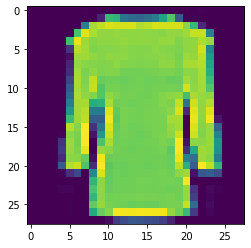

In [134]:
#显示图片
plt.imshow(train_image[55000])

In [37]:
#找到最大的值，用于后面归一化
np.max(train_image[0])


255

In [102]:
#用数字代表分类，9代表鞋子
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [120]:
#将图片数据归一化,255是像素点的最大值
train_image  = train_image / 255.0
test_image = test_image / 255.0
train_image[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [58]:
train_image = train_image.astype(float)
test_image = test_image.astype(float)
train_image

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [135]:
train_image.size/(28*28)


60000.0

In [136]:
#图片是二维数据，Flatten是用于将二维数据转换为一维向量

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax')) #输出概率值

In [137]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])  
#对于softmax，对于train_label采用的是顺序整数编码，采用sparse_categorical_crossentropy，若数据为独热编码，则采用categorical_crossentropy


In [143]:

model.fit(train_image, train_label, epochs=1,batch_size=1)

60000/60000 [==============================] - 92s 2ms/step - loss: 0.4495 - acc: 0.8400


In [142]:
#利用测试数据集和测试标签来评估模型情况
#模型会输出评估值
model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 880us/step - loss: 0.3675 - acc: 0.8670


[0.3675484359264374, 0.8669999837875366]

In [70]:
#上述是采用sparse_categorical_crossentropy作为loss函数，
#下面采用categorical_crossentropy方式尝试下训练
train_label_onehot = tf.keras.utils.to_categorical(train_label)


In [73]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)


In [75]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])  

In [76]:
model.fit(train_image, train_label_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2787 - acc: 0.8963
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2673 - acc: 0.9003
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2529 - acc: 0.9051
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2441 - acc: 0.9086
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2373 - acc: 0.9115


In [77]:
#预测结果， evaluate是评估函数，即用测试数据以及预期结果和测试结果进行比对，最后告诉你这个模型对于测试数据的准确略。
# predict是预测函数，输入数据，就会返回结果
predict = model.predict(test_image)

In [100]:
#取出最大值的索引
np.argmax(predict[0])

9

In [80]:
test_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [86]:
#接下来，一起跟着进行一次故意过拟合，然后通过dropout方式抑制过拟合，调参将其变成正好拟合
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10,activation='softmax')) #输出概率值

In [87]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [98]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])  

In [99]:
#训练+评估一起。
history = model.fit(train_image, train_label_onehot, epochs=5,validation_data=(test_image,test_label_onehot))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1534 - acc: 0.9416 - val_loss: 0.3819 - val_acc: 0.8948
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1509 - acc: 0.9424 - val_loss: 0.3797 - val_acc: 0.8903
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1472 - acc: 0.9438 - val_loss: 0.4000 - val_acc: 0.8858
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1437 - acc: 0.9459 - val_loss: 0.3982 - val_acc: 0.8921
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1408 - acc: 0.9474 - val_loss: 0.4180 - val_acc: 0.8885


In [94]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

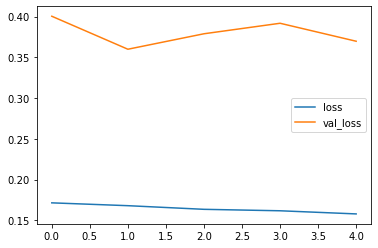

In [96]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

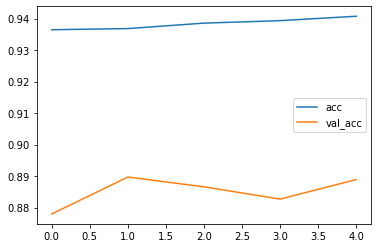

In [97]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()